2. 结合归一化和正则化来优化网络模型结构，观察对比loss结果。

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision.transforms.v2 import ToTensor
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#加载数据集
olivetti_face = fetch_olivetti_faces(data_home = './data/olivetti_faces', shuffle = True)
# print(olivetti_face)
#拆分数据集
train_images, test_images, train_target, test_target = train_test_split(olivetti_face.data, olivetti_face.target, test_size = 0.2)
print(train_images.shape, test_images.shape, train_target.shape, test_target.shape)

(320, 4096) (80, 4096) (320,) (80,)


In [3]:
#将数据转换为张量
train_images_tensor = torch.tensor(train_images, dtype = torch.float32)
test_images_tensor = torch.tensor(test_images, dtype = torch.float32)
train_target_tensor = torch.tensor(train_target, dtype = torch.int64)
test_target_tensor = torch.tensor(test_target, dtype = torch.int64)

In [4]:
#创建数据加载器
train_dataset = TensorDataset(train_images_tensor, train_target_tensor)
test_dataset = TensorDataset(test_images_tensor, test_target_tensor)
#创建数据加载器
train_loader = DataLoader(dataset = train_dataset, batch_size = 10, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 10, shuffle = True)

In [5]:
#参数设置
epochs = 1000
learning_rate = 0.001

In [ ]:
#导入模型
from torch_nn_model import NN_Model_1,NN_Model_2,NN_Model_3,NN_Model_4
#创建模型
model1 = NN_Model_1()   
model2 = NN_Model_2()   #归一化
model3 = NN_Model_3()   #正则化
model4 = NN_Model_4()   #正则化、归一化
models = [model1,model2,model3,model4]

In [7]:
#定义损失函数
loss_fn = torch.nn.CrossEntropyLoss()
#定义优化器
def optimizer(model):
    optimizer_SGD = torch.optim.SGD(model.parameters(), lr = learning_rate)
    return optimizer_SGD
#初始化损失记录列表
loss_history = []

#训练模型
def train_model(model,loss,optimizer,train_loader,epochs):
    loss_history.clear()
    model.train()   #将模型设置为训练模式
    for epoch in range(epochs):
        running_loss = 0.0
        for images, target in train_loader:
            #前向传播
            output = model(images)
            #计算损失
            loss = loss_fn(output, target)
            #梯度清零
            optimizer.zero_grad()
            #反向传播
            loss.backward()
            #更新参数
            optimizer.step()
            #累计损失
            running_loss += loss.item()
        # 计算平均损失并记录
        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)
        #打印信息
        if epoch % 100 == 0:
            print(f'Epoch:{epoch} Loss: {avg_loss}')
# 绘制损失曲线
def draw_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

#测试模型
def test_model(model):
    model.eval()    #将模型设置为评估模式
    correct = 0
    total = 0
    with torch.no_grad():
        for images, target in test_loader:
            output = model(images.reshape(-1, 4096))
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy: {correct/total*100}%')

Epoch:0 Loss: 3.6930939480662346


Epoch:100 Loss: 3.5747571140527725
Epoch:200 Loss: 3.203121952712536
Epoch:300 Loss: 2.3101035691797733
Epoch:400 Loss: 1.3792888280004263
Epoch:500 Loss: 0.7536615654826164
Epoch:600 Loss: 0.4183694696985185
Epoch:700 Loss: 0.24650405067950487
Epoch:800 Loss: 0.15735910087823868
Epoch:900 Loss: 0.10774076159577817


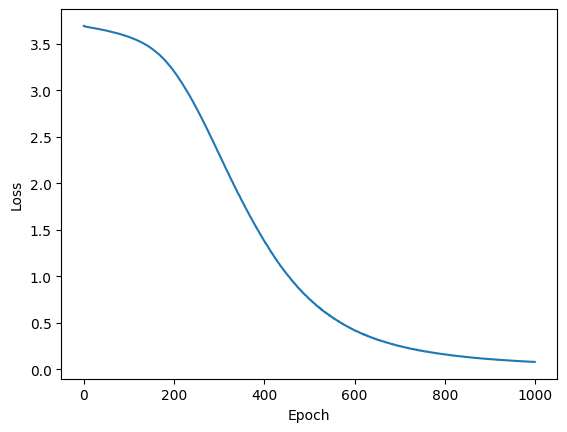

Accuracy: 87.5%
Epoch:0 Loss: 3.5960749238729477
Epoch:100 Loss: 1.0592417269945145
Epoch:200 Loss: 0.4006108669564128
Epoch:300 Loss: 0.2131317495368421
Epoch:400 Loss: 0.13465609261766076
Epoch:500 Loss: 0.10005967214237899
Epoch:600 Loss: 0.06605884188320488
Epoch:700 Loss: 0.051548109855502844
Epoch:800 Loss: 0.04868477233685553
Epoch:900 Loss: 0.04122432920848951


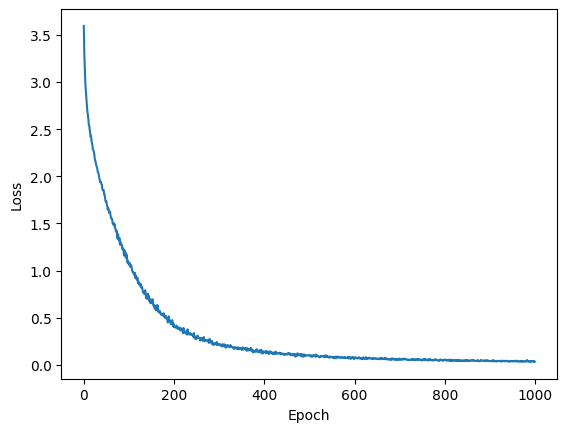

Accuracy: 95.0%
Epoch:0 Loss: 3.6953232884407043
Epoch:100 Loss: 3.6293166801333427
Epoch:200 Loss: 3.5146058425307274
Epoch:300 Loss: 3.2763680815696716
Epoch:400 Loss: 2.81780843436718
Epoch:500 Loss: 2.341281197965145
Epoch:600 Loss: 1.831669993698597
Epoch:700 Loss: 1.5692217163741589
Epoch:800 Loss: 1.314001638442278
Epoch:900 Loss: 1.1033650636672974


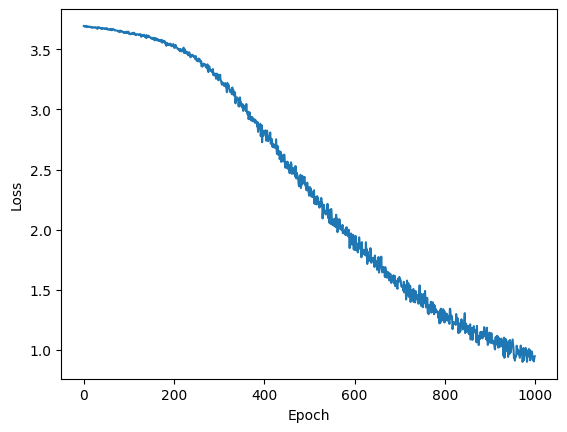

Accuracy: 90.0%
Epoch:0 Loss: 3.7130731493234634
Epoch:100 Loss: 1.8347702138125896
Epoch:200 Loss: 1.2006625793874264
Epoch:300 Loss: 0.7877132343128324
Epoch:400 Loss: 0.589167547877878
Epoch:500 Loss: 0.4278400931507349
Epoch:600 Loss: 0.33456323156133294
Epoch:700 Loss: 0.2734145156573504
Epoch:800 Loss: 0.27640504273585975
Epoch:900 Loss: 0.2340429483447224


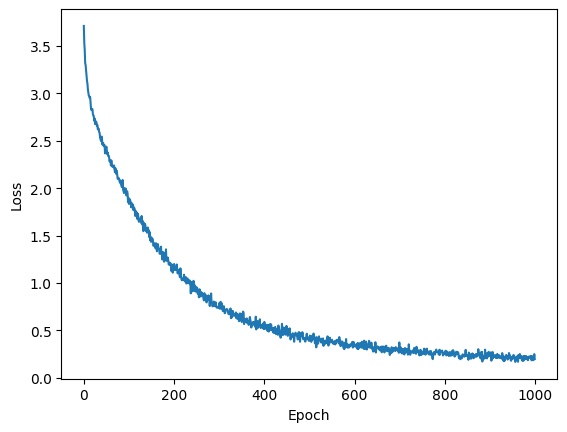

Accuracy: 93.75%


In [8]:
for model in models:
    train_model(model,loss_fn,optimizer(model),train_loader,epochs)
    draw_loss(loss_history)
    test_model(model)